### Retail Analysis with Walmart Data
Course-end Project 2
Description

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

#### Analysis Tasks

#### Basic Statistics tasks

* Which store has maximum sales

* Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

* Which store/s has good quarterly growth rate in Q3’2012

* Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

* Provide a monthly and semester view of sales in units and give insights

#### Statistical Model

* For Store 1 – Build  prediction models to forecast demand

* Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

* Change dates into days by creating new variable.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
sales=pd.read_csv("Walmart_Store_sales.csv")
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
sales.shape

(6435, 8)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
#Checking null values
sales.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
#Changing datetime format
sales['Date']=pd.to_datetime(sales['Date'],format="%d-%m-%Y")

In [9]:
sales.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106


### Which store has maximum sales

In [10]:
#grouping by Store wrt Weekly Sales
Max_sales=sales.groupby(['Store'])['Weekly_Sales'].sum()

In [11]:
#### {:.2f}.format(...) formats the value to two decimal places before printing
#### or   print(round(Max_sales.max(),2))

In [12]:
print("{:.2f}".format(Max_sales.max()))
print(Max_sales.idxmax())

301397792.46
20


* Store no: 20 has max sales of 301397792.46

### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [13]:
##### ".to_frame()"----- converts into Dataframe

In [14]:
store_std=sales.groupby(['Store'])['Weekly_Sales'].std()
store_std.to_frame()

,Weekly_Sales
Store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745
6,212525.855862
7,112585.469220
8,106280.829881
9,69028.666585


In [15]:
print(round(store_std.max(),2))
print(store_std.idxmax())

317569.95
14


* Store no: 14 has max std of 317569.95

### Also, find out the coefficient of mean to standard deviation

In [16]:
### The coefficient of variation (CV) is the ratio of the standard deviation (σ) to the mean (μ), expressed as a percentage. It measures the relative 
# variability of a dataset.

#Formula for Coefficient of Variation (CV):
# CV= (σ/μ)×100%

In [17]:
### CV less than 10= Very good
### CV 10-20=  good
### CV 21-30 = Acceptable
### CV greater than 30= Not acceptable

In [18]:
sales_mean=sales.groupby(['Store'])['Weekly_Sales'].mean()

In [19]:
cv=(store_std/sales_mean)*100
print(round(cv,2))

Store
1     10.03
2     12.34
3     11.50
4     12.71
5     11.87
6     13.58
7     19.73
8     11.70
9     12.69
10    15.91
11    12.23
12    13.79
13    13.25
14    15.71
15    19.34
16    16.52
17    12.55
18    16.28
19    13.27
20    13.09
21    17.03
22    15.68
23    17.97
24    12.36
25    15.99
26    11.01
27    13.52
28    13.73
29    18.37
30     5.20
31     9.02
32    11.83
33     9.29
34    10.82
35    22.97
36    16.26
37     4.21
38    11.09
39    14.99
40    12.34
41    14.82
42     9.03
43     6.41
44     8.18
45    16.56
Name: Weekly_Sales, dtype: float64


* Store nos:30,31,33,37,42,43,44 have very good CV

###  Which store/s has good quarterly growth rate in Q3’2012

In [20]:
# Creating year,month and day variables
sales['Year']=sales['Date'].dt.year
sales['Month']=pd.DatetimeIndex(sales['Date']).month
sales['Day']=pd.DatetimeIndex(sales['Date']).day

In [21]:
sales.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19


In [22]:
### .dt.strftime('%Y-%m-%d') converts it back to a string in the YYYY-MM-DD format.
#You can customize the format:
#'%d-%m-%Y' → 08-03-2025
#'%B %d, %Y' → March 08, 2025
#'%m/%d/%Y' → 03/08/2025


In [23]:
#Coverting date to string with desired format
sales['Date']=sales['Date'].dt.strftime('%d-%b-%y')

In [24]:
sales.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12


In [25]:
# Converting integers in the month column to the corresponding names
month_dict={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
sales['Month']=sales['Month'].apply(lambda x:month_dict[x])

In [26]:
sales.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12


In [27]:
### .ngroups gives the number of unique years in the 'Year' column.
###  .get_group(year) extracts only the rows where 'Year' matches the given value.

In [28]:
#yearly_data=sales.groupby(['Year'])
#yearly_data.ngroups
# yearly_data_2010=yearly_data.get_group(2010)

In [29]:
year_2010=sales[sales['Year']==2010]
year_2011=sales[sales['Year']==2011]
year_2012=sales[sales['Year']==2012]

In [30]:
year_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
100,1,06-Jan-12,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6
101,1,13-Jan-12,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13
102,1,20-Jan-12,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20
103,1,27-Jan-12,1319325.59,0,54.26,3.290,220.078852,7.348,2012,Jan,27
104,1,03-Feb-12,1636339.65,0,56.55,3.360,220.172015,7.348,2012,Feb,3


In [31]:
#Creating quarters
quarter_map = {
    'Jan': 'Q1', 'Feb': 'Q1', 'Mar': 'Q1',
    'Apr': 'Q2', 'May': 'Q2', 'Jun': 'Q2',
    'Jul': 'Q3', 'Aug': 'Q3', 'Sept': 'Q3',
    'Oct': 'Q4', 'Nov': 'Q4', 'Dec': 'Q4'
}

# Assign quarters
year_2012['Quarter'] = year_2012['Month'].map(quarter_map)

In [32]:
year_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter
100,1,06-Jan-12,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6,Q1
101,1,13-Jan-12,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13,Q1
102,1,20-Jan-12,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20,Q1
103,1,27-Jan-12,1319325.59,0,54.26,3.290,220.078852,7.348,2012,Jan,27,Q1
104,1,03-Feb-12,1636339.65,0,56.55,3.360,220.172015,7.348,2012,Feb,3,Q1


In [33]:
quarterlysales_2012=year_2012.groupby('Quarter')
quarterlysales_2012.ngroups

4

In [34]:
#get individual quartile groups
q1_group=quarterlysales_2012.get_group('Q1')
q2_group=quarterlysales_2012.get_group('Q2')
q3_group=quarterlysales_2012.get_group('Q3')
q4_group=quarterlysales_2012.get_group('Q4')                                

In [35]:
#getting total sales of all stores in each quarter
q1_sales=q1_group.groupby(['Store'])['Weekly_Sales'].sum()
q2_sales=q2_group.groupby(['Store'])['Weekly_Sales'].sum()
q3_sales=q3_group.groupby(['Store'])['Weekly_Sales'].sum()
q4_sales=q4_group.groupby(['Store'])['Weekly_Sales'].sum()

In [36]:
q2_sales.head()

Store
1    20978760.12
2    25083604.88
3     5620316.49
4    28454363.67
5     4466363.69
Name: Weekly_Sales, dtype: float64

In [37]:
q3_sales.head()

Store
1    20253947.78
2    24303354.86
3     5298005.47
4    27796792.46
5     4163790.99
Name: Weekly_Sales, dtype: float64

In [38]:
q3_growthrate=q3_sales-q2_sales
q3_growthrate.sort_values(ascending=False)

Store
7      971928.12
16     557205.66
26     520356.34
39     500987.77
35     484108.12
41     433901.28
24     292158.81
23     152606.33
40     145457.84
44     104845.38
38     -32436.44
32     -92742.10
37     -96481.13
33    -115380.03
17    -132947.88
30    -147612.43
19    -163745.39
43    -168264.19
8     -170678.25
25    -213930.25
21    -266997.03
11    -271290.51
42    -271479.93
5     -302572.70
36    -320299.94
3     -322311.02
15    -343162.04
34    -367622.08
18    -406429.38
28    -426188.16
27    -436301.34
29    -454073.36
31    -460524.05
9     -462785.55
13    -587947.84
20    -632670.34
22    -642754.35
4     -657571.21
6     -666597.68
10    -713110.41
1     -724812.34
2     -780250.02
45    -809499.45
12    -826064.21
14   -3967974.76
Name: Weekly_Sales, dtype: float64

* Store no 7 has highest growth rate in Q3

### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [39]:
sales.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12
2,1,19-Feb-10,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19


In [40]:
superbowl_sales=sales[(sales['Date']=='12-Feb-10') | (sales['Date']=='11-Feb-11') | (sales['Date']=='10-Feb-12')]
print(round(superbowl_sales['Weekly_Sales'].mean(),2))

1079127.99


In [41]:
labourday_sales=sales[(sales['Date']=='10-Sep-10') | (sales['Date']=='09-Sep-11') | (sales['Date']=='07-Sep-12')]
print(round(labourday_sales['Weekly_Sales'].mean(),2))

1042427.29


In [42]:
thanksgiving_sales=sales[(sales['Date']=='26-Nov-10')|(sales['Date']=='25-Nov-11')|(sales['Date']=='23-Nov-12')]
print(round(thanksgiving_sales['Weekly_Sales'].mean(),2))

1471273.43


In [43]:
christmas_sales=sales[(sales['Date']=='31-Dec-10')|(sales['Date']=='30-Dec-11')|(sales['Date']=='28-Dec-12')]
print(round(christmas_sales['Weekly_Sales'].mean(),2))

960833.11


* Thanksgiving has higher mean sales than anyother hoiday sales

In [44]:
#grouping data set by holiday flag
holidaysdf=sales.groupby(sales['Holiday_Flag'])

In [45]:
#getting only holiday data
holiday_sales=holidaysdf.get_group(1)
print(round(holiday_sales['Weekly_Sales'].mean(),2))

1122887.89


In [46]:
nonholiday_sales=holidaysdf.get_group(0)
print(round(nonholiday_sales['Weekly_Sales'].mean(),2))

1041256.38


* Holidays have higher sales mean than non holidays

In [47]:
# Each holiday vs non holiday sales mean

In [48]:
print(round(superbowl_sales['Weekly_Sales'].mean(),2))
print(round(labourday_sales['Weekly_Sales'].mean(),2))
print(round(thanksgiving_sales['Weekly_Sales'].mean(),2))
print(round(christmas_sales['Weekly_Sales'].mean(),2))

1079127.99
1042427.29
1471273.43
960833.11


In [49]:
print(round(nonholiday_sales['Weekly_Sales'].mean(),2))

1041256.38


* All holiday sales are higher than mean of non-holiday sales, other than Christmas holiday sales.
* Christmas holiday sales have negavtive impact than other holidays when compared to the other non holiday sales mean.

### Provide a monthly and semester view of sales in units and give insights

In [50]:
totalmonthlysales=sales.groupby(['Month'])
totalmonthlysales.ngroups

12

In [51]:
totalmonthlysales['Weekly_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
Apr,630.0,1.026762e+06,543864.624192,232769.09,534583.5075,948789.575,1402726.700,2565259.92
Aug,585.0,1.048017e+06,542653.059046,224031.19,575997.7800,969387.480,1442819.280,2283540.30
Dec,450.0,1.281864e+06,774037.720767,209986.25,616295.8450,1154880.920,1714442.515,3818686.45
Feb,540.0,1.053200e+06,564207.057354,234218.03,554628.6350,980765.180,1431376.635,2623469.95
Jan,360.0,9.238846e+05,472616.460339,231155.90,521051.0125,830944.935,1256202.130,2047766.07
Jul,630.0,1.031748e+06,531141.778886,224806.96,577830.8550,953770.830,1396269.865,2358055.30
Jun,585.0,1.064325e+06,548683.953608,238172.66,581745.7200,984336.040,1442092.080,2363601.47
Mar,585.0,1.013309e+06,529805.743801,238084.08,544408.1400,943951.670,1365824.970,2237544.75
May,540.0,1.031714e+06,536589.412470,239206.26,543588.2225,969562.080,1388603.735,2370116.52


In [52]:
year_2010.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12
2,1,19-Feb-10,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19
3,1,26-Feb-10,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,26
4,1,05-Mar-10,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,5


In [53]:
monthlysales_2010=year_2010.groupby(['Month'])
monthlysales_2010['Weekly_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
Apr,225.0,1.028499e+06,545424.247706,257361.30,527019.7800,969594.470,1.391256e+06,2495630.51
Aug,180.0,1.042445e+06,539322.149800,224031.19,573235.4675,981237.730,1.418366e+06,2219813.50
Dec,225.0,1.283380e+06,793498.247838,209986.25,599730.0700,1149612.040,1.707298e+06,3818686.45
Feb,180.0,1.057405e+06,571029.268079,267956.30,534468.2225,997074.975,1.470286e+06,2623469.95
Jul,225.0,1.033689e+06,534340.296029,242047.03,570231.2100,959229.090,1.371987e+06,2334788.42
Jun,180.0,1.068034e+06,556849.016817,259419.91,551924.8925,1002244.665,1.423940e+06,2363601.47
Mar,180.0,1.010666e+06,531192.529079,262893.76,519202.3825,964763.590,1.340757e+06,2237544.75
May,180.0,1.037283e+06,542985.021379,267065.35,530713.0675,973124.460,1.368593e+06,2370116.52
Nov,180.0,1.126963e+06,642755.592239,224639.76,558963.6550,995672.600,1.508792e+06,2939946.38


In [54]:
monthlysales_2011=year_2011.groupby(['Month'])
monthlysales_2011['Weekly_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
Apr,225.0,1.006784e+06,532258.833292,232769.09,534578.7800,937473.130,1.372485e+06,2313861.81
Aug,180.0,1.047774e+06,549887.085283,237095.82,570423.6150,955710.315,1.445838e+06,2273470.62
Dec,225.0,1.280347e+06,755843.504954,215359.21,630327.2800,1158708.980,1.781529e+06,3676388.98
Feb,180.0,1.035174e+06,552442.387986,234218.03,556183.5800,961012.950,1.420064e+06,2351143.07
Jan,180.0,9.094665e+05,466122.257495,231155.90,513597.3125,812167.545,1.215770e+06,1886393.94
Jul,225.0,1.021828e+06,526841.700020,224806.96,582381.9500,936001.980,1.396927e+06,2123787.79
Jun,180.0,1.054297e+06,543819.984741,238172.66,585639.7750,974263.155,1.441112e+06,2182246.69
Mar,180.0,9.964247e+05,522341.244321,238084.08,536784.3775,929977.755,1.352847e+06,2143424.61
May,180.0,1.009156e+06,523438.331445,239206.26,543719.8250,943238.085,1.371667e+06,2095599.93


In [55]:
monthlysales_2012=year_2012.groupby(['Month'])
monthlysales_2012['Weekly_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
Apr,180.0,1.049561e+06,558183.253234,249798.75,548516.0000,950743.050,1.456415e+06,2565259.92
Aug,225.0,1.052670e+06,541866.268723,237129.81,576620.3100,976137.730,1.497055e+06,2283540.30
Feb,180.0,1.067020e+06,571613.468771,242526.70,564122.8100,970644.815,1.448538e+06,2462978.28
Jan,180.0,9.383026e+05,479887.956347,236920.49,540523.1525,855680.105,1.269834e+06,2047766.07
Jul,180.0,1.041719e+06,535223.017499,249134.32,577204.6500,960529.395,1.456741e+06,2358055.30
Jun,225.0,1.069379e+06,548322.510590,244338.31,583648.5900,988764.840,1.451782e+06,2245257.18
Mar,225.0,1.028932e+06,536489.204740,246970.97,557547.2500,952264.910,1.427881e+06,2214967.44
May,180.0,1.048703e+06,545296.384619,261851.74,549055.7525,988833.255,1.428744e+06,2207214.81
Oct,180.0,1.024232e+06,526815.738642,253731.13,548829.2100,962230.855,1.413769e+06,2246411.89


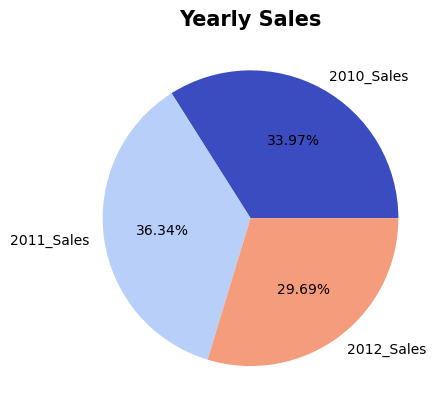

In [59]:
#Yearly veiw of Sales
list1=[year_2010['Weekly_Sales'].sum(),year_2011['Weekly_Sales'].sum(),year_2012['Weekly_Sales'].sum()]
labels='2010_Sales','2011_Sales','2012_Sales'
#cmaps=viridis, plasma, inferno, magma, cividis and 
#       Blues, Greens, Oranges, Purples, Reds, Greys
#       BuGn, BuPu, GnBu, OrRd, PuBu, PuBuGn, PuRd, RdPu, YlGn, YlGnBu, YlOrBr, YlOrRd
#       coolwarm, Spectral, seismic, bwr, RdBu, RdYlBu, RdYlGn
#       twilight, twilight_shifted, hsv
cmap=plt.get_cmap('coolwarm')
colors=cmap(np.arange(3)*95)
plt.pie(list1,labels=labels,autopct='%0.2f%%',colors=colors)
plt.title("Yearly Sales", fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

In [60]:
year_2010['Month'].value_counts()

Month
Apr     225
Jul     225
Oct     225
Dec     225
Feb     180
Mar     180
May     180
Jun     180
Aug     180
Sept    180
Nov     180
Name: count, dtype: int64

In [61]:
semester1_2010=year_2010[year_2010['Month'].isin(['Jan','Feb','Apr','May','Jun'])]
semester1_2010.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12
2,1,19-Feb-10,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19


In [62]:
semester2_2010=year_2010[year_2010['Month'].isin(['Jul','Aug','Sept','Oct','Nov','Dec'])]
semester2_2010.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
21,1,02-Jul-10,1492418.14,0,80.91,2.669,211.223533,7.787,2010,Jul,2
22,1,09-Jul-10,1546074.18,0,80.48,2.642,211.108414,7.787,2010,Jul,9
23,1,16-Jul-10,1448938.92,0,83.15,2.623,211.100385,7.787,2010,Jul,16


In [63]:
semester1_2011=year_2011[year_2011['Month'].isin(['Jan','Feb','Apr','May','Jun'])]
semester1_2011.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
48,1,07-Jan-11,1444732.28,0,48.27,2.976,211.404742,7.742,2011,Jan,7
49,1,14-Jan-11,1391013.96,0,35.40,2.983,211.457411,7.742,2011,Jan,14
50,1,21-Jan-11,1327405.42,0,44.04,3.016,211.827234,7.742,2011,Jan,21


In [64]:
semester2_2011=year_2011[year_2011['Month'].isin(['Jul','Aug','Sept','Oct','Nov','Dec'])]
semester2_2011.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
73,1,01-Jul-11,1488538.09,0,85.55,3.524,215.184137,7.962,2011,Jul,1
74,1,08-Jul-11,1534849.64,0,85.83,3.480,215.277175,7.962,2011,Jul,8
75,1,15-Jul-11,1455119.97,0,88.54,3.575,215.361109,7.962,2011,Jul,15


In [65]:
semester1_2012=year_2012[year_2012['Month'].isin(['Jan','Feb','Apr','May','Jun'])]
semester1_2012.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter
100,1,06-Jan-12,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6,Q1
101,1,13-Jan-12,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13,Q1
102,1,20-Jan-12,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20,Q1


In [66]:
semester2_2012=year_2012[year_2012['Month'].isin(['Jul','Aug','Sept','Oct','Nov','Dec'])]
semester2_2012.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter
126,1,06-Jul-12,1769854.16,0,81.57,3.227,221.883779,6.908,2012,Jul,6,Q3
127,1,13-Jul-12,1527014.04,0,77.12,3.256,221.924158,6.908,2012,Jul,13,Q3
128,1,20-Jul-12,1497954.76,0,80.42,3.311,221.932727,6.908,2012,Jul,20,Q3


In [67]:
###  colors = cmap(np.arange(2)*18)
# np.arange(8) (representing two categories: Semester 1 & Semester 2)-uses 8 colors
# Multiplying by 18 scales the values, selecting specific color indices.
# cmap() applies the colormap to the scaled values, generating a list of colors.

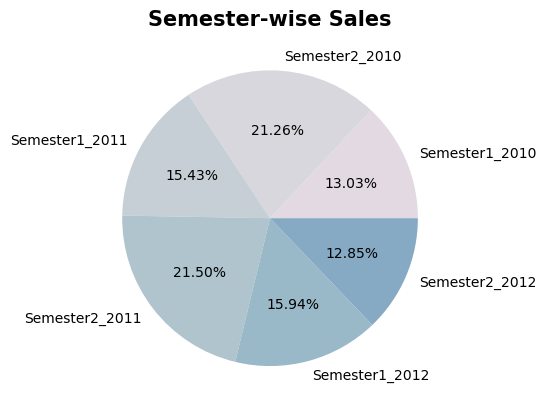

In [69]:
list2=[semester1_2010['Weekly_Sales'].sum(),semester2_2010['Weekly_Sales'].sum(),semester1_2011['Weekly_Sales'].sum(),
      semester2_2011['Weekly_Sales'].sum(),semester1_2012['Weekly_Sales'].sum(),semester2_2012['Weekly_Sales'].sum()]
labels='Semester1_2010','Semester2_2010','Semester1_2011','Semester2_2011','Semester1_2012','Semester2_2012'
cmap=plt.get_cmap('twilight')
colors=cmap(np.arange(8)*15)
plt.pie(list2,labels=labels,colors=colors,autopct='%0.2f%%')
plt.title("Semester-wise Sales", fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

* The sales was highest in Semester 2 in 2011

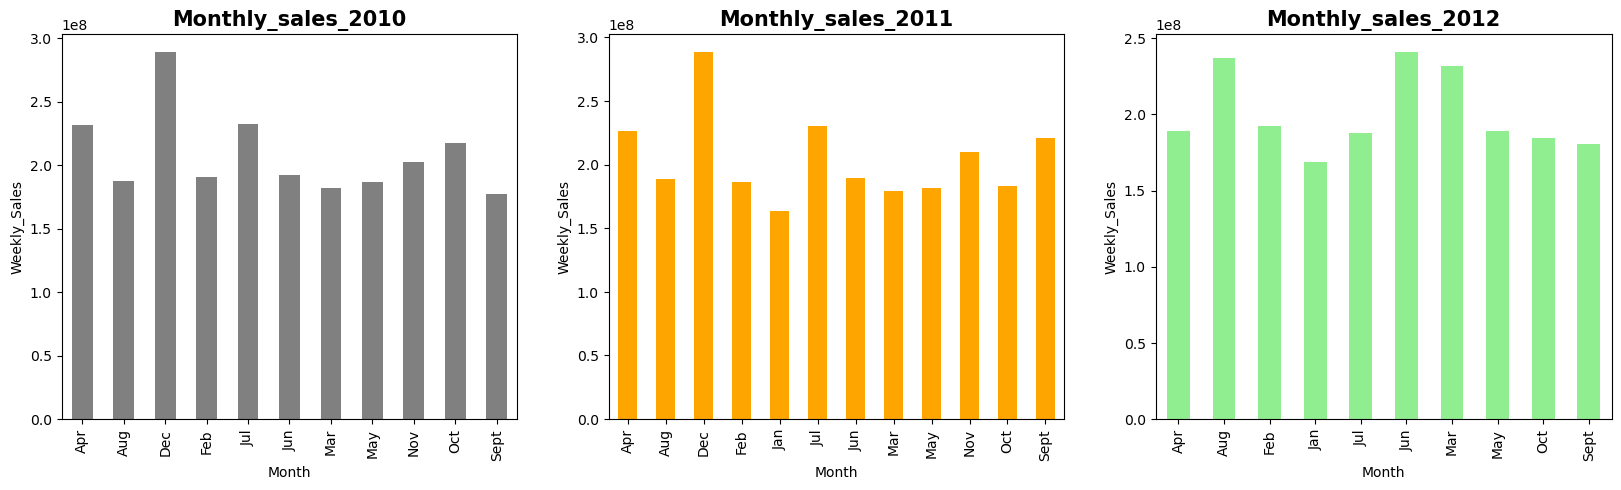

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
monthlysales_2010['Weekly_Sales'].sum().plot.bar(color='grey')
plt.title("Monthly_sales_2010",fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel('Weekly_Sales')


plt.subplot(1,3,2)
monthlysales_2011['Weekly_Sales'].sum().plot.bar(color='orange')
plt.title("Monthly_sales_2011",fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel('Weekly_Sales')


plt.subplot(1,3,3)
monthlysales_2012['Weekly_Sales'].sum().plot.bar(color='lightgreen')
plt.title("Monthly_sales_2012",fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel('Weekly_Sales')

plt.show()

* These bar graphs show monthly sales of each year

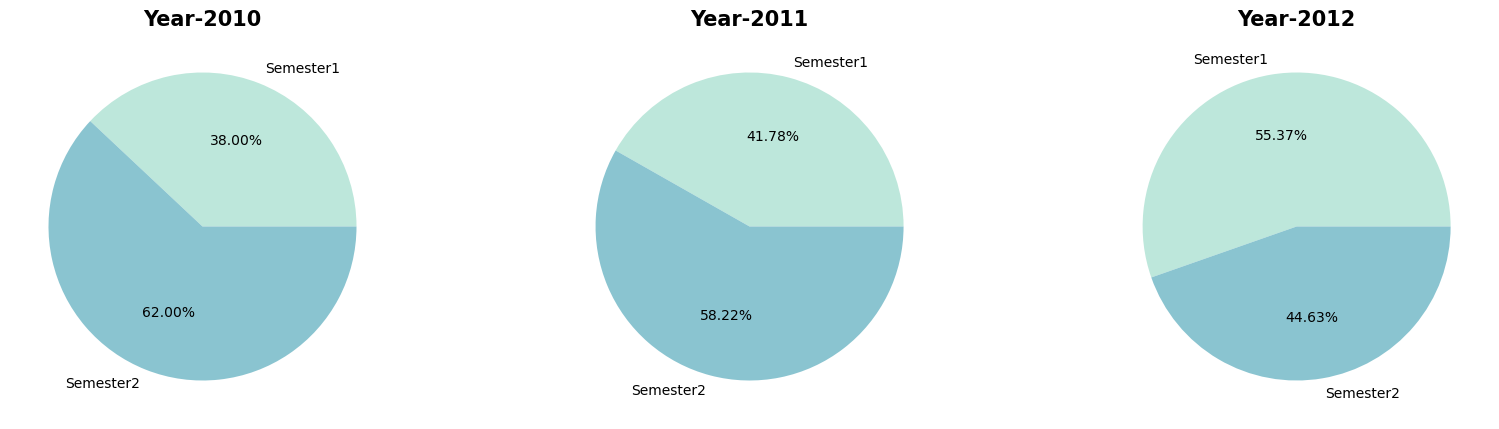

In [72]:
list1=[semester1_2010['Weekly_Sales'].sum(),semester2_2010['Weekly_Sales'].sum()]
list2=[semester1_2011['Weekly_Sales'].sum(),semester2_2011['Weekly_Sales'].sum()]
list3=[semester1_2012['Weekly_Sales'].sum(),semester2_2012['Weekly_Sales'].sum()]
labels=['Semester1','Semester2']
cmap=plt.get_cmap('icefire')
colors=cmap(np.arange(2)*18)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.pie(list1,labels=labels,autopct='%0.2f%%',colors=colors)
plt.title("Year-2010", fontdict={'fontsize':15,'fontweight':'bold'})

plt.subplot(1,3,2)
plt.pie(list2,labels=labels,autopct='%0.2f%%',colors=colors)
plt.title("Year-2011", fontdict={'fontsize':15,'fontweight':'bold'})

plt.subplot(1,3,3)
plt.pie(list3,labels=labels,autopct='%0.2f%%',colors=colors)
plt.title("Year-2012", fontdict={'fontsize':15,'fontweight':'bold'})

plt.show()

* These pie charts show semseter wise sales percentage for each year

In [73]:
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12
2,1,19-Feb-10,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19
3,1,26-Feb-10,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,26
4,1,05-Mar-10,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,5


In [74]:
corr_df=sales[['Store','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]
corr_df.corr()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.335332,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-0.335332,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.022659,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.060023,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.209492,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,0.223531,-0.106176,0.101158,-0.034684,-0.302020,1.000000


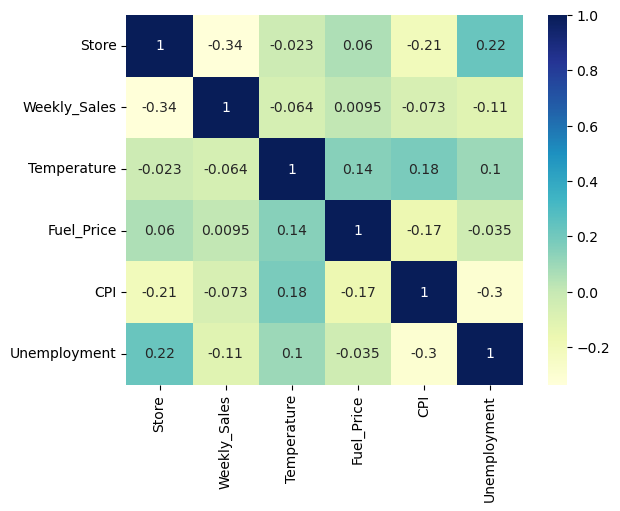

In [75]:
sns.heatmap(corr_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

* CPI,Fuel price,Unemployment does not have significant impact on weekly sales

###  For Store 1 – Build  prediction models to forecast demand

In [76]:
sales.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12


In [77]:
# getting data from store
store=sales.groupby('Store')
store1=store.get_group(1)
store1['strdate']=pd.to_datetime(store1['Date'])
store1['Month']=store1['strdate'].dt.month
store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,strdate
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2010-02-05
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,2010-02-12
2,1,19-Feb-10,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02-19
3,1,26-Feb-10,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02-26
4,1,05-Mar-10,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,2010-03-05


In [78]:
store1.shape

(143, 12)

### Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [79]:
### Assigning dates to nos as categorical data cannot be used in building a linear model
dummy=[]
for i in range(1,144):
    dummy.append(i)
store1['dummy_date']=dummy

In [80]:
store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,strdate,dummy_date
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2010-02-05,1
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,2010-02-12,2
2,1,19-Feb-10,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02-19,3
3,1,26-Feb-10,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02-26,4
4,1,05-Mar-10,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,2010-03-05,5


In [81]:
model_df=store1[['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Year','Month','Day','dummy_date','Weekly_Sales']]
model_df.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,dummy_date,Weekly_Sales
0,1,0,42.31,2.572,211.096358,8.106,2010,2,5,1,1643690.90
1,1,1,38.51,2.548,211.242170,8.106,2010,2,12,2,1641957.44
2,1,0,39.93,2.514,211.289143,8.106,2010,2,19,3,1611968.17
3,1,0,46.63,2.561,211.319643,8.106,2010,2,26,4,1409727.59
4,1,0,46.50,2.625,211.350143,8.106,2010,3,5,5,1554806.68


In [82]:
X=model_df.drop(columns='Weekly_Sales')
y=model_df['Weekly_Sales']

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [85]:
lr.fit(X_train,y_train)

LinearRegression()

In [86]:
lr.intercept_

-2364627031.702242

In [87]:
pred=lr.predict(X_test)

In [88]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
r2

0.36370795268920575

* Our linear modle has R2 of 36%

In [89]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     3.585
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           0.000644
Time:                        16:03:07   Log-Likelihood:                -1506.8
No. Observations:                 114   AIC:                             3034.
Df Residuals:                     104   BIC:                             3061.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Store        -2.365e+09   2.04e+10     -0.116      0.908   -4.28e+10    3.81e+10
Holiday_Flag  5.748e+04   5.19e+04      1.107      0.271   -4.55e+04     1.6e+05
Temperature  -2791.4208   1171.719     -2.382      0.019   -5114.984    -467.857
Fuel_Price    4.154e+04   7.15e+04      0.581      0.562      -1e+05    1.83e+05
CPI           2.514e+04   1.46e+04      1.717      0.089   -3892.399    5.42e+04
Unemployment  1.591e+04   6.82e+04      0.233      0.816   -1.19e+05    1.51e+05
Year          1.174e+06   1.01e+07      0.116      0.908   -1.89e+07    2.13e+07
Month         1.114e+05   8.44e+05      0.132      0.895   -1.56e+06    1.78e+06
Day          -1522.8776   2.77e+04     -0.055      0.956   -5.65e+04    5.34e+04
dummy_date   -2.452e+04   1.94e+05     -0.127      0.900   -4.09e+05     3.6e+05
==============================================================================
Omnibus:                      107.827   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1379.530
Skew:                           3.169   Prob(JB):                    2.75e-300
Kurtosis:                      18.819   Cond. No.                     3.16e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### CPI,Unemployement & Fuel Price vs Weekly _Sales

In [90]:
### In Seaborn, line_kws (short for line keyword arguments) is an optional parameter used in plotting functions like sns.regplot() and sns.lmplot()
# "color": "red" → Makes the regression line red.
#  "linewidth": 2" → Increases the thickness of the line.
#  "linestyle": "--" → Uses a dashed line style.

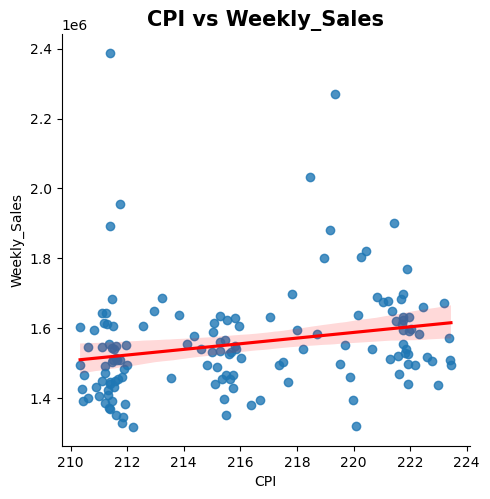

In [91]:
sns.lmplot(x='CPI',y='Weekly_Sales',data=store1,line_kws={'color':'red'})
plt.title('CPI vs Weekly_Sales',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

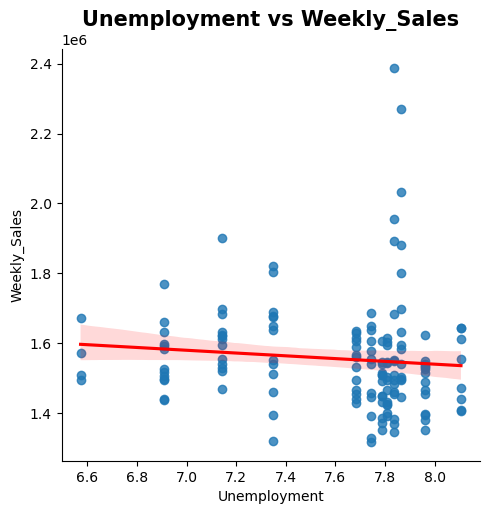

In [92]:
sns.lmplot(x='Unemployment',y='Weekly_Sales',data=store1,line_kws={'color':'red'})
plt.title('Unemployment vs Weekly_Sales',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

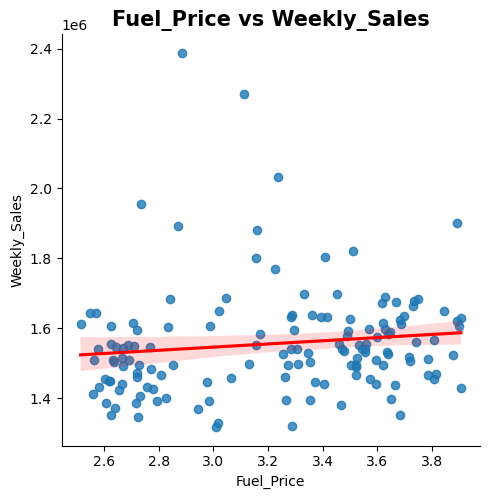

In [93]:
sns.lmplot(x='Fuel_Price',y='Weekly_Sales',data=store1,line_kws={'color':'red'})
plt.title('Fuel_Price vs Weekly_Sales',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

### Change date to day of week

In [94]:
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,05-Feb-10,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,12-Feb-10,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12
2,1,19-Feb-10,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19
3,1,26-Feb-10,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,26
4,1,05-Mar-10,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,5


In [95]:
# converting str object to datetime obejct
sales['Date']=pd.to_datetime(sales['Date'])
#Changing dates to day of the week
sales['Day_of_the_week']=sales['Date'].dt.day_name()
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_the_week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,26,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,5,Friday


## Steps and inferences:
- Changing the date type to datetime format
- Finding the store with max sales, which is Store no: 20 - 301397792.46
- Finding the store with max standard deviation, which is Store no: 14 - 317569.95
- Finding the coefficient of mean to standard deviation-Store nos:30,31,33,37,42,43,44 have very good CV
- Creating year,month and day variables and creating quartiles to find Store no 7 has highest growth rate in Q3’2012
- Thanksgiving has higher mean sales than anyother hoiday sales
- All holiday sales are higher than mean of non-holiday sales, other than Christmas holiday sales.
- Providing yearly, monthly adn semester wise view of sales.
- We can observe that 2011 has more sales(36.34%)
- Semester2 in 2010 and 2011 has more sales(21.2% & 21.5%) and lowest is semester2 in 2012(12.85%)
- We can observe that semester 2 has more sales than semester 1 in 2010 and 2011,whereas semester 1 has more sales in 2012.
- We build a preidtion model for store1, using linear regression
- We visualised the realtionship between sales and other independent variables